# **assignment 1**
### by group 13350742

In [1]:
# imports
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns

# part 1 - COVID-19 Disasters

### original SIR Model

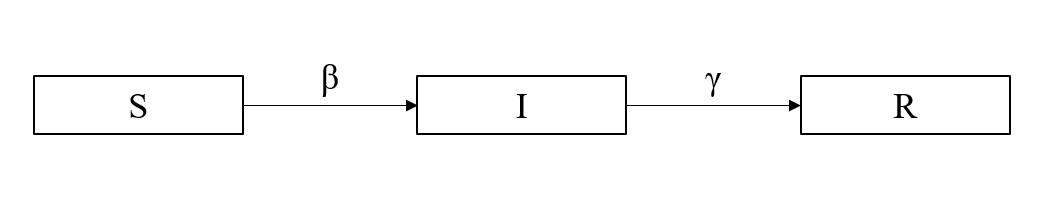

**list of parameters in the model:**

$N$: total population set to 1

$S(t)$: percentage of people susceptible on day t

$I(t)$: percentage of people infected on day t

$R(t)$: percentage of people recovered on day t



$R_{0}$: basic reproduction number

$R_{e}(t)$: effective reproduction number

$\beta$: infection rate

$\gamma$: recovery rate 

setting compartment sizes $S(t)$, $I(t)$, $R(t)$ at inception (t=0) ...

In [2]:
# population size of 1 (constant) allows for fractional view
N = 1
# 5% infected individuals initially
I0 = 0.05
# 0% recovered individuals initially
R0 = 0
# solving N=S+I+R for initial value of S
S0 = N - I0 - R0 
# tuple representing vector encompassing initial compartment decisions 
y0 = S0, I0, R0

setting rates of infection ($\beta$) and recovery ($\gamma$) ...

In [3]:
# infection rate
β = 0.5
# recovery rate, interpretable as 1/D with average recovery duration D
Ɣ = 0.15

calculating basic reproduction number $R_{0}$ ...

In [4]:
# basic reproduction number
R_nought = β / Ɣ 

setting time horizon of 1 year with 365 days ...

In [5]:
# creating 365 points in time
t = np.linspace(0, 364, 365)

setting up SIR model in terms of ODEs ...

- $\frac{dS}{dt} = -\beta * I * \frac{S}{N} $
- $\frac{dI}{dt} = \beta * I * \frac{S}{N} - \gamma * I $
- $\frac{dR}{dt} = \gamma * I $

note that we set $N = 1$ so it vanishes from the ODEs above ...

In [6]:
# SIR model
def deriv_sir(y, t, N, β, Ɣ):
    S, I, R = y
    dSdt = -β * S * I 
    dIdt = β * S * I - Ɣ * I
    dRdt = Ɣ * I
    return dSdt, dIdt, dRdt

solving ODE system for $S(t)$, $I(t)$, $R(t)$ for all days of the year ...

In [7]:
# integration of ODEs yields S, I, and R
ret = odeint(deriv_sir, y0, t, args=(N, β, Ɣ))
S, I, R = ret.T 

creating a useful function to get the days of the compartments becoming a constant fraction and calculating the point in time where $R_{e}(t) = R_{0}*\frac{S(t)}{N}$ is equal to or below 1 for the first time ...

In [8]:
# get the date when S,I,D become constant and respective S,I,D fractions
def get_stable_1(t, S, I, R):
    S_bottom = round(min(S)*100, 2)
    I_peak = round(max(I)*100, 2)
    R_peak = round(max(R)*100, 2)

    i = 0
    while S[i] > min(S):
            i += 1
    S_bottom_date = int(t[i])

    i = 0
    while I[i] < max(I):
            i += 1
    I_peak_date = int(t[i])

    i = 0
    while R[i] < max(R):
            i += 1
    R_peak_date = int(t[i])

    return S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date

# get the day when S,I,D become constant and respective S,I,D fractions
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date = get_stable_1(t, S, I, R)

# get the day when effective reproduction = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1: 
        t_1 = time
        break

population size: 1
infected at t=0: 0.05
R0=3.33
R_eff=1 at t=11d
susceptible reach bottom on day: 189
susceptible bottom number is: 3.85%
infected reach peak on day: 11
infected peak is: 35.4%
recovered reach peak on day: 189
recovered peak is: 96.15%


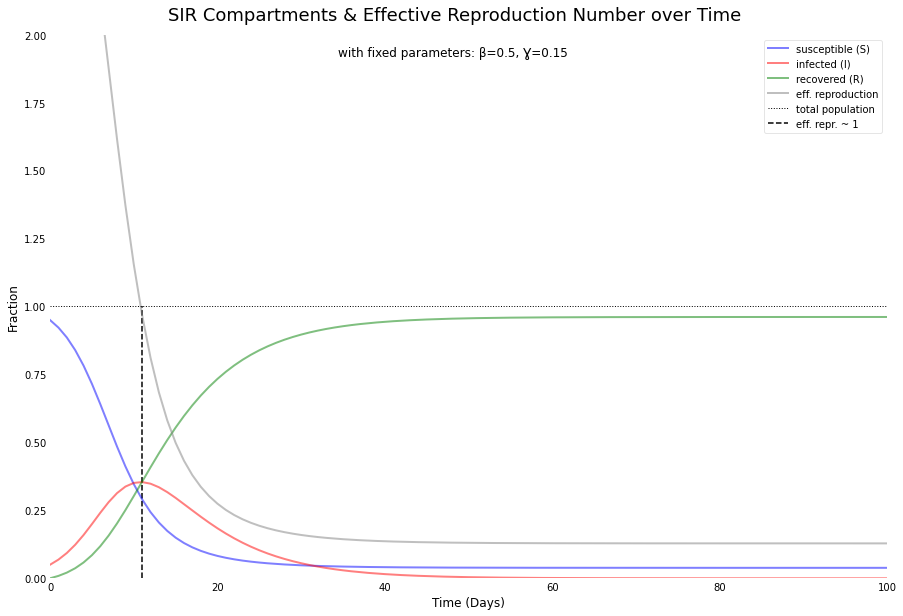

In [9]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}
R0={round(R_nought,2)}
R_eff=1 at t={t_1}d
susceptible reach bottom on day: {S_bottom_date}
susceptible bottom number is: {S_bottom}%
infected reach peak on day: {I_peak_date}
infected peak is: {I_peak}%
recovered reach peak on day: {R_peak_date}
recovered peak is: {R_peak}%""")

# plot graph 
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label="susceptible (S)")
ax.plot(t, I, 'r', alpha=0.5, lw=2, label="infected (I)")
ax.plot(t, R, 'g', alpha=0.5, lw=2, label="recovered (R)")
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label="eff. reproduction")

plt.figtext(.5,.9,f"SIR Compartments & Effective Reproduction Number over Time", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: β={β}, Ɣ={Ɣ} ", fontsize=12, ha='center')
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_ylim(0,2)
ax.set_xlim(0,100)
plt.axhline(y=1,linewidth=1, color="k", label = "total population", linestyle=':')
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed', label="eff. repr. ~ 1")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- under the pre-defined conditions, the unmitigated SIR case, saw the virus overruning the population in ~40 days with a peak infection share of ~35%
<br/>- also, the intuition of the effective reproduction number was confirmed as values &gt 1 represent increasing infections and values &lt 1 represent decreasing number of infections (see vertical dashed line)
</div>

## part 1 (a)

- the SIR model is a 3-compartment model (see above)
- extend this model to 4 compartments, where the 4th compartment represents deaths ($D$)
- mortality is modelled by new transitions from infected ($I$) $\rightarrow$ dead ($D$) defined by the mortality rate $\mu$
- susceptible ($S$) and recovered ($R$) individuals do not die
- derive the corresponding system of equations for $S$, $I$, $R$ and $D$
- e.g., $\frac{dD}{dt} = \mu I$ (this is not the only difference to SIR)
- in addition, the basic reproduction number may now depend on µ as well, how?

### Extended SIRD Model

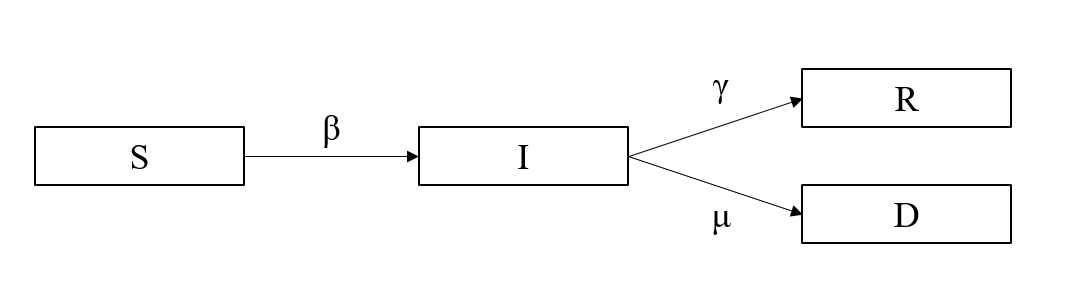

**updated list of parameters in the model:**

$N$: total population set to 1

$S(t)$: percentage of people susceptible on day t

$I(t)$: percentage of people infected on day t

$R(t)$: percentage of people recovered on day t

**$D(t)$: percentage of people dead on day t**


$R_{0}$: basic reproduction number

$R_{e}(t)$: effective reproduction number

$\beta$: infection rate

$\gamma$: recovery rate 

**$\mu$: mortality rate**


**ODEs**
- $\frac{dS}{dt} = -\beta * I * \frac{S}{N} $
    - unchanged
- $\frac{dI}{dt} = \beta * I \frac{S}{N} - \gamma * I -\mu * I$
    - **incorporation of $\mu$ since individuals leave the $I$ compartment for both $R$ and $D$**
- $\frac{dR}{dt} = \gamma * I $
    - unchanged
- $\frac{dD}{dt} = \mu * I$
    - **incorporation of compartment D with transition rate (mortality)**

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- $R_{0}=\frac{\beta}{\gamma_{SIRD}+\mu}$
<br/>- $R_{0}$ is previously measured as $\frac{\beta}{\gamma}$, the infection rate over the recovery rate, which gives a base-line infectiousness of COVID 
<br/>- taking death into consideration, represented by the death rate $\mu$, we add one more scenario after infection, which is why we need to add $\mu$ to the denominator
<br/>- assuming the same $R_{0}$ as with the SIR model we know that the denominator needs to be the same so $\gamma_{SIR} = \gamma_{SIRD} + \mu$ 
<br/>- as before, the effective reproduction number is calcualted by $R_{e}(t)=R_{0}*\frac{S(t)}{N}$
</div>

note that the previously set parameters for the SIR models are used where possible, we need to set some new parameters as seen above ... 

In [10]:
# 0% deceased individuals initially
D0 = 0
# solving N=S+I+R.D for initial value of S
S0 = N - I0 - R0 - D0 
# tuple representing vector encompassing initial compartment decisions 
y0 = S0, I0, R0, D0
# mortality rate
μ = 0.05

calculating $\gamma$ using the same basic reproduction number $R_{0}$ as before ...

In [11]:
# calculate gamma by solving y_sir = y_sird + mu for y_sird
Ɣ_sird = Ɣ - μ
print(f"the new Ɣ for the sIRD model is {round(Ɣ_sird, 2)}")

the new Ɣ for the sIRD model is 0.1


setting up SIRD model in terms of ODEs ...

In [12]:
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I 
    dIdt = β * S * I - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

solving ODE system for $S(t)$, $I(t)$, $R(t)$, $D(t)$  for all days of the year ...

In [13]:
# integration of ODEs yields S, I, and R
ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ_sird, μ))
S, I, R, D = ret.T

creating a useful function to get the days of the compartments becoming a constant fraction and calculating the point in time where $R_{e}(t) = R_{0}*\frac{S(t)}{N}$ is equal to or below 1 for the first time ...

In [14]:
# get the day when S,I,R,D become constant and respective S,I,R,D fractions
def get_stable_2(t, S, I, R, D):
    S_bottom = round(min(S)*100, 2)
    I_peak = round(max(I)*100, 2)
    R_peak = round(max(R)*100, 2)
    D_peak = round(max(D)*100, 2)

    i = 0
    while S[i] > min(S):
            i += 1
    S_bottom_date = int(t[i])

    i = 0
    while I[i] < max(I):
            i += 1
    I_peak_date = int(t[i])

    i = 0
    while R[i] < max(R):
            i += 1
    R_peak_date = int(t[i])

    i = 0
    while D[i] < max(D):
            i += 1
    D_peak_date = int(t[i])

    return S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date

# get the day when S,I,R,D become constant and respective S,I,RD fractions
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

# get the day when effective reproduction = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

population size: 1
infected at t=0: 0.05
R0=3.33
R_eff=1 at t=11d
susceptible reach bottom on day: 190
susceptible bottom number is: 3.85%
infected reach peak on day: 11
infected peak is: 35.4%
recovered reach peak on day: 190
recovered peak is: 64.1
dead reach peak on day: 190
dead peak is: 32.05%


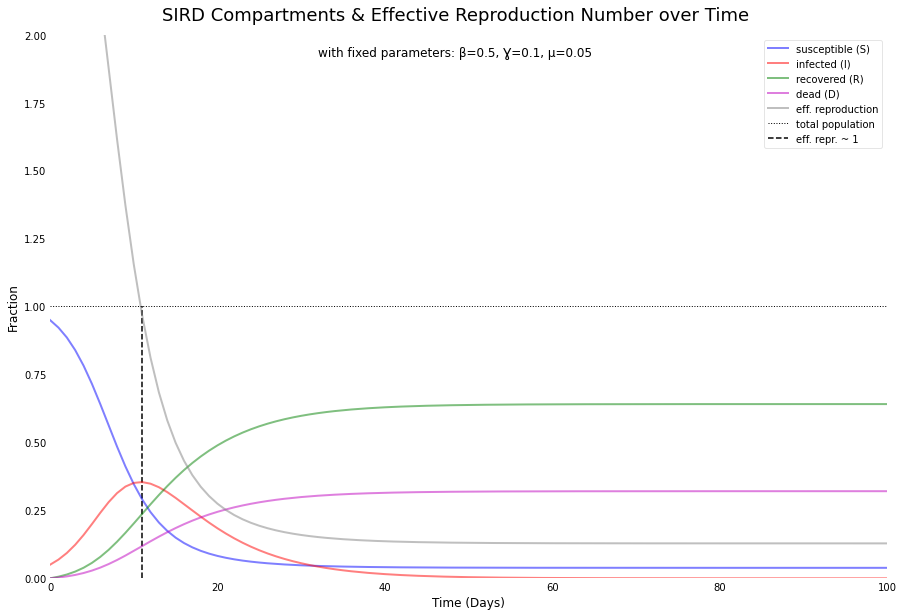

In [15]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}
R0={round(R_nought,2)}
R_eff=1 at t={t_1}d
susceptible reach bottom on day: {S_bottom_date}
susceptible bottom number is: {S_bottom}%
infected reach peak on day: {I_peak_date}
infected peak is: {I_peak}%
recovered reach peak on day: {R_peak_date}
recovered peak is: {R_peak}
dead reach peak on day: {D_peak_date}
dead peak is: {D_peak}%""")

# plot graph 
fig = plt.figure(facecolor='w', figsize=(15, 10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label="susceptible (S)")
ax.plot(t, I, 'r', alpha=0.5, lw=2, label="infected (I)")
ax.plot(t, R, 'g', alpha=0.5, lw=2, label="recovered (R)")
ax.plot(t, D, 'm', alpha=0.5, lw=2, label="dead (D)")
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label="eff. reproduction")
plt.figtext(.5,.9,f"SIRD Compartments & Effective Reproduction Number over Time", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: β={β}, Ɣ={round(Ɣ_sird, 2)}, μ={μ}", fontsize=12, ha='center')
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_ylim(0,2)
ax.set_xlim(0,100)
plt.axhline(y=1,linewidth=1, color="k", label = "total population", linestyle=':')
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed', label="eff. repr. ~ 1")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- under the pre-defined conditions, the unmitigated SIRD case, saw the virus overruning the population, just as the SIR model, in ~40 days with a peak infection share of ~35% (same as SIR)
<br/>- also, the intuition of the SIRD-specific effective reproduction number was, again, confirmed as values &gt 1 represent increasing infections and values &lt 1 represent decreasing number of infections (see vertical dashed line)
<br/>- it can clearly be seen that, deceased people make up a considerable chunk of the total population at ~32% in the end  
</div>

## part 1 (b)

- assume that the basic reproduction number $R_{0}$ for B.1.1.7 is not exactly known but only the range $R_{0} \in [3.0, 4.0]$
- assume that the mortality rate $\mu$ is also not exactly known but in the range $\mu \in [0.4\%, 4\%]$
- study how these parameter uncertainties affect the prediction of $D$ at $t = 365d$
- what about the cumulative number of deaths after a year?

we know that $R_{0} = \frac{\beta}{\gamma + \mu}$ so changing all those variables can result in a different $R_{0}$ value

note that, if not explcitly mentioned, the previously set parameters are used

### (b) changing $\mu$ (ceteris paribus)

we know that $\mu \in [0.4\%, 4\%]$

the change of $\mu$ will also change the $R_{0}$, we have to carefully select beta and gamma to guarantee that $R_{0} \in [3.0, 4.0]$

$3 \leq \frac{\beta}{\gamma+\mu} \leq 4 $ where $\mu \in [0.4\%, 4\%]$

by solving the inequality equations, we found:
- $\gamma$ has to $\geq 0.104$ so that $\beta$ has a solution 
- assume $\gamma =0.2$, then $\beta$ is $\in [0.72, 0.96]$
- in following cells, we use $\beta = 0.8$ in order to keep $R_{0}=4$

population size: 1
infected at t=0: 0.05


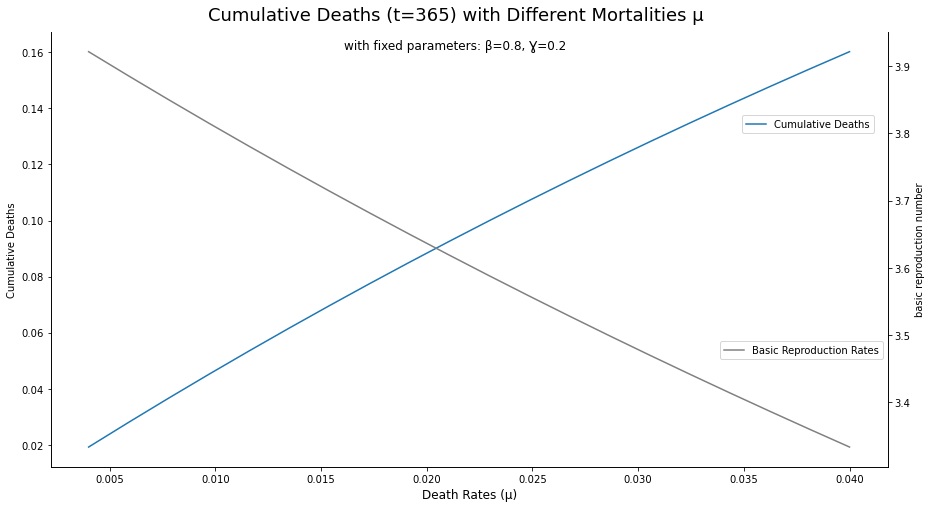

In [16]:
# setting parameters
β = 0.8 
Ɣ = 0.2 

# pick 20 differenty mortality rates within the specified range
mu_list = list(np.linspace(0.004, 0.04, 20)) 

# loop to integrate and calculate final deaths with different mus
RIP = []
R0s = []
for μ in mu_list:
    ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
    S, I, R, D = ret.T 
    R0s.append(β/(Ɣ+μ))
    RIP.append(D[-1])

# print additional info
print(f"""population size: {N}
infected at t=0: {I0}""")
    
# plot the relationship 
fig, ax1 = plt.subplots(figsize=(15, 8))
plt.xlabel("Death Rates (μ)", fontsize=12, ha='center')
ax2 = ax1.twinx()
ax1.plot(mu_list,RIP, label="Cumulative Deaths")
ax2.plot(mu_list,R0s, label="Basic Reproduction Rates", color='gray')
ax2.ylim = (3,4)
ax1.set_ylabel("Cumulative Deaths")
ax2.set_ylabel('basic reproduction number')
plt.figtext(.5,.9,"Cumulative Deaths (t=365) with Different Mortalities μ", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: β={β}, Ɣ={Ɣ}", fontsize=12, ha='center')
ax1.legend(bbox_to_anchor=(0.82, 0.82))
ax2.legend(bbox_to_anchor=(1, 0.3))
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- from the graph above, we can clearly see that given certain β and Ɣ, number of deaths is highly determined by death rate μ with a positive correlation
</div>

### (b) changing $R_{0}$ (ceteris paribus)

we keep $\mu = 0.04$

still, $3 \leq \frac{\beta}{\gamma+\mu} \leq 4 $ has to hold

we know $\gamma \in (0, 1]$

we also know $\beta$ is defined by $\gamma$ and $R_{0}$ by $\beta = R_{0} * (\gamma + 0.04)$

therefore, $\beta \in (0.12,4.16]$ by solving for the extreme cases

population size: 1
infected at t=0: 0.05


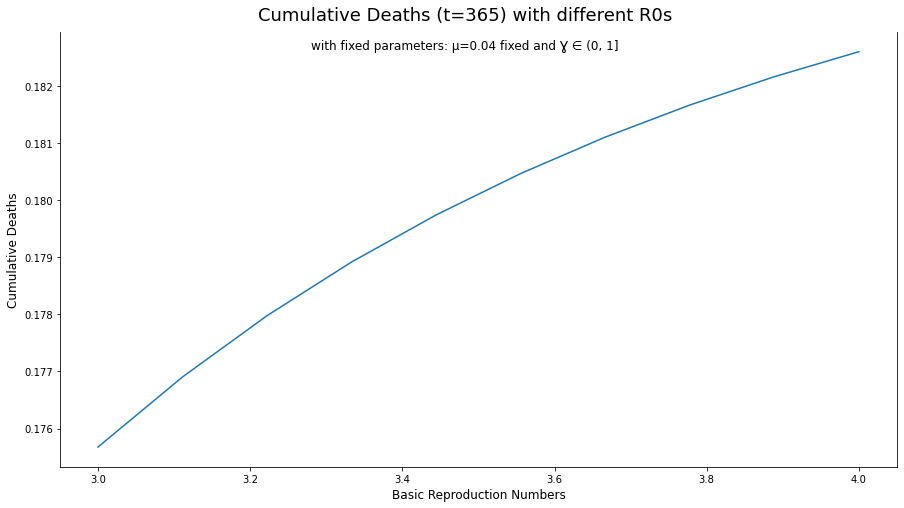

In [17]:
gamma_list = list(np.linspace(0.00001, 1, 10)) #Define γ range
R0_list = list(np.linspace(3, 4, 10)) #Define R0 range
beta_list = [] #Calculate beta and put them in here
para_dict = {'R0':[], 'Gamma':[], 'Beta':[], 'Death':[]} #Empty dictionary to be filled

# solving ODEs for different combinations of gamma and R0
for r in R0_list:
    for g in gamma_list:
        beta = r*(g + μ)
        ret = odeint(deriv_sird, y0, t, args=(N, beta, g, μ))
        S, I, R, D = ret.T 
        # fill para_dict with results
        para_dict['R0'].append(r) 
        para_dict['Gamma'].append(g)
        para_dict['Beta'].append(round(beta,3))
        para_dict['Death'].append(D[-1])

# data Transformation
df = pd.DataFrame(para_dict) #Create dataframe
df_R0 = df.groupby('R0').mean() #Calculate mean values across all columns per R0

# print additional info
print(f"""population size: {N}
infected at t=0: {I0}""")

# plot the relationship
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(R0_list, df_R0['Death'])
plt.figtext(.5,.9,"Cumulative Deaths (t=365) with different R0s", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: μ={μ} fixed and Ɣ ∈ (0, 1]", fontsize=12, ha='center')
plt.xlabel("Basic Reproduction Numbers", fontsize=12, ha='center')
plt.ylabel("Cumulative Deaths", fontsize=12, ha='center')
ax.spines['top'].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- from the graph above, we can also see a positive effect of R0 on death counts, however, this effect is much less significant than that of $\mu$
<br/>- therefore, we decide to further investigate the interaction between $R_{0}$ and $\mu$, and their combined effect of death counts
</div>

### (b) comparing different $R_{0}$ compositions (ceteris paribus)

In [18]:
# finding 5 combinations for R_nought = 3 and 4 respectively
target_values = [3, 4]
gamma_picks = [0.05, 0.075, 0.1, 0.125, 0.15]
results = pd.DataFrame(index = gamma_picks, columns = target_values)
for target in target_values:
    for gamma in gamma_picks:
        beta_interim = target*(gamma+μ)
        results.loc[gamma, target] = beta_interim
print("the following combinations were yielded (gammas are represented as index with betas within table):")
results 

the following combinations were yielded (gammas are represented as index with betas within table):


,3,4
0.050,0.27,0.36
0.075,0.345,0.46
0.100,0.42,0.56
0.125,0.495,0.66
0.150,0.57,0.76


calculating deaths for different combinations yielding $R_{0}^{SIRD} = 3$ ...

In [19]:
# calculate D cumulatively for combinations resulting in R_nought of 3
cumulative_deaths_r03 = {}

for i in range(len(results)):
    beta_interim = round(results.loc[results.index[i], 3], 3)
    gamma_interim = round(results.index[i], 3)
    ret = odeint(deriv_sird, y0, t, args=(N, beta_interim, gamma_interim, μ))
    S, I, R, D = ret.T
    cumulative_deaths_r03[f"Ɣ{gamma_interim}, β{beta_interim}"] = D[364]
    
print("cumulative deaths including 365th day:", cumulative_deaths_r03)

cumulative deaths including 365th day: {'Ɣ0.05, β0.27': 0.41958215633497076, 'Ɣ0.075, β0.345': 0.32836864395967474, 'Ɣ0.1, β0.42': 0.2697313861073448, 'Ɣ0.125, β0.495': 0.2288629942708768, 'Ɣ0.15, β0.57': 0.19874944239137482}


population size: 1
infected at t=0: 0.05
population size: 1
infected at t=0: 0.05


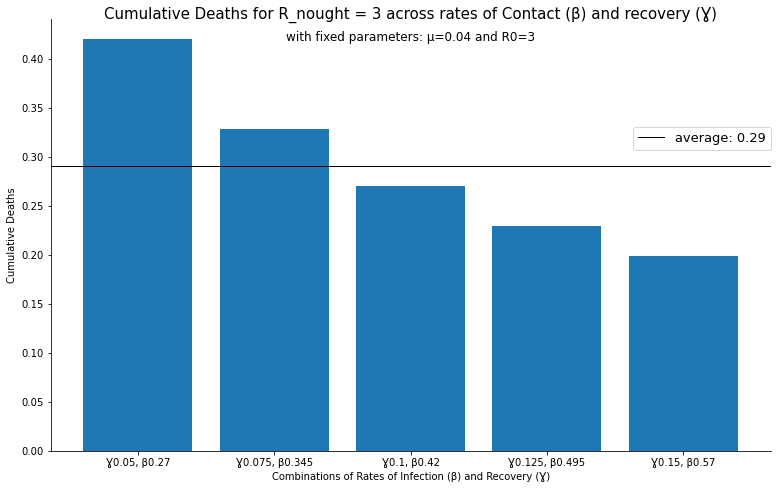

In [20]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}""")

# print additional info
print(f"""population size: {N}
infected at t=0: {I0}""")

# plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(cumulative_deaths_r03.keys(),cumulative_deaths_r03.values())
avg_r03 = round(np.array(list(cumulative_deaths_r03.values())).mean(),2)
plt.axhline(y=avg_r03,linewidth=1, color="k", label = f"average: {avg_r03}")
plt.legend(bbox_to_anchor=(1, 0.75), loc=1, borderaxespad=0., fontsize = 13)
plt.figtext(.5,1,"Cumulative Deaths for R_nought = 3 across rates of Contact (β) and recovery (Ɣ)", fontsize=15, ha="center")
plt.figtext(.5,.95,f"with fixed parameters: μ={μ} and R0=3", fontsize=12, ha='center')
plt.xlabel("Combinations of Rates of Infection (β) and Recovery (Ɣ)")
plt.ylabel("Cumulative Deaths")
for spine in ("top", "right"): 
    ax.spines[spine].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- there seem to be large differences in cumulative deaths across different compositions of the same $R_{0}$
<br/>- the smaller the recovery rate ($\gamma$) (equivalent to longer recovery durations), the greater the amount of deaths, even though the infection rate ($\beta$) decreases simultaneously when holding $R_{0} = 3$
</div>

calculating deaths for different combinations yielding $R_{0} = 4$ ...

In [21]:
# calculate D cumulatively for combinations resulting in R_nought of 3
cumulative_deaths_r04 = {}

for i in range(len(results)):
    beta_interim = round(results.loc[results.index[i], 4], 3)
    gamma_interim = round(results.index[i], 3)
    ret = odeint(deriv_sird, y0, t, args=(N, beta_interim, gamma_interim, μ))
    S, I, R, D = ret.T
    cumulative_deaths_r04[f"Ɣ{gamma_interim}, β{beta_interim}"] = D[364]
    
print("cumulative deaths including 365th day:", cumulative_deaths_r04)

cumulative deaths including 365th day: {'Ɣ0.05, β0.36': 0.43610868343123343, 'Ɣ0.075, β0.46': 0.34130245100506373, 'Ɣ0.1, β0.56': 0.2803555847471896, 'Ɣ0.125, β0.66': 0.23787746584147265, 'Ɣ0.15, β0.76': 0.20657779927992687}


population size: 1
infected at t=0: 0.05


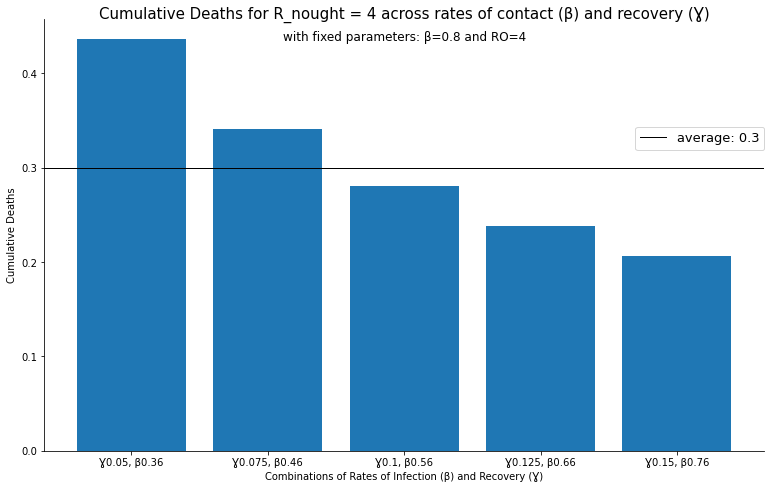

In [22]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}""")

# plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(cumulative_deaths_r04.keys(),cumulative_deaths_r04.values())
avg_r04 = round(np.array(list(cumulative_deaths_r04.values())).mean(),2)
plt.axhline(y=avg_r04,linewidth=1, color="k", label = f"average: {avg_r04}")
plt.legend(bbox_to_anchor=(1, 0.75), loc=1, borderaxespad=0., fontsize = 13)
plt.figtext(.5,1,"Cumulative Deaths for R_nought = 4 across rates of contact (β) and recovery (Ɣ)", fontsize=15, ha="center")
plt.figtext(.5,.95,f"with fixed parameters: β={β} and RO=4", fontsize=12, ha='center')
plt.xlabel("Combinations of Rates of Infection (β) and Recovery (Ɣ)")
plt.ylabel("Cumulative Deaths")
for spine in ("top", "right"): 
    ax.spines[spine].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- the previous observations of large differences in cumulative deaths across different compositions of the same $R_{0}$ can be confirmed
<br/>- again, the smaller $\gamma$s result in more deaths with decreasing $\beta$s unable to counteracting this inverse relation between number of deaths and $\gamma$
<br/>- comparing both ends of the spectrum of $R_{0} \in [3,4]$ we can see that higher basic production numbers ($R_{0} = 4$) only lead to slightly higher average cumulative death counts (30%) compared to 29% from $R_{0} = 3$, all other things held equal
</div>

### (b) deep dive into the relationship between $R_{0}$ & $\mu$ (ceteris paribus)

we assume $\beta$ is 1/10 of $R_{0}$

now we can create two arrays for $\mu \in [0.4\%,4\%]$ and $R_{0} \in [3,4]$ as columns and indexes of a dataframe, which contains the calculated cumulative deaths at t=365

population size: 1
infected at t=0: 0.05


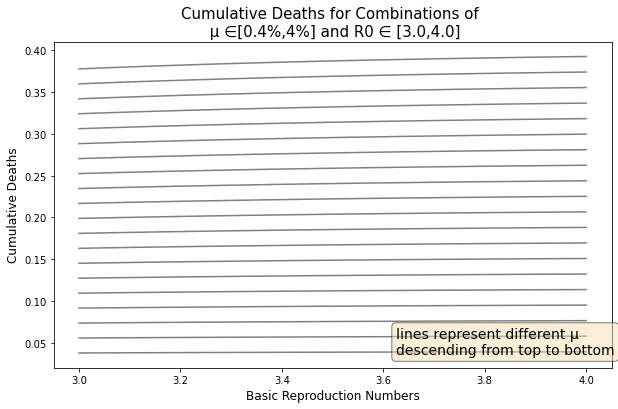

In [23]:
# dataframe creation
df = pd.DataFrame(index=np.linspace(3, 4, 20), #R_nought
                  columns=np.linspace(0.004, 0.04, 20)) #mu

# solvinf ODEs
for r in df.index:
    β = r/10 #Calculate β from R_nought, Assuming 
    
    for μ in df.columns:
        Ɣ = β/r - μ #Calculate μ from β & R_nought
        
        # integrate the SIRD equations over the time grid t
        ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
        S, I, R, D = ret.T 
        df.loc[r,[μ]]= D[-1]

print(f"""population size: {N}
infected at t=0: {I0}""")
        
# plot the data:
fig = plt.figure(figsize=(10, 6))
plt.plot(df.index, df, color = "gray")
plt.title("Cumulative Deaths for Combinations of \n μ ∈[0.4%,4%] and R0 ∈ [3.0,4.0]", fontsize=15, ha='center')
plt.xlabel("Basic Reproduction Numbers", fontsize=12, ha='center')
plt.ylabel("Cumulative Deaths", fontsize=12, ha='center')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.55, 0.12, "lines represent different μ\ndescending from top to bottom", transform=ax.transAxes, fontsize=14, verticalalignment='bottom', bbox=props)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- from the graph above, we can see: with regard to the prediction of death number at year end, also known as the cumulative number of deaths, $R_{0}$ has little impact as shown in the following graph
<br/>- however, the death number is highly determined by the death rate $\mu$
</div>

it could also be insightful to take a look into the effect of $\mu$ on the spread between minimum and maximum deaths (cumulative) other factors held constant ...

population size: 1
infected at t=0: 0.05


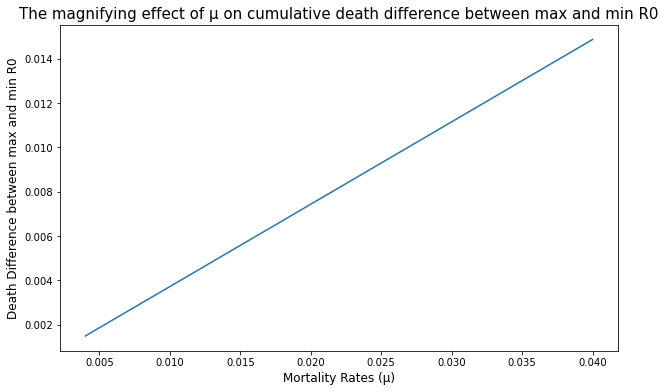

In [24]:
# calculating measures
stat = df.astype(float).describe()
spread = stat.loc['max'] - stat.loc['min']

print(f"""population size: {N}
infected at t=0: {I0}""")

# plot the relationship
fig = plt.figure(figsize=(10, 6))
plt.plot(stat.columns, spread)
plt.title("The magnifying effect of μ on cumulative death difference between max and min R0", fontsize=15, ha='center')
plt.xlabel("Mortality Rates (μ)", fontsize=12, ha='center')
plt.ylabel("Death Difference between max and min R0", fontsize=12, ha='center')
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- from the graph above, we can see: There is one interesting finding about the interaction of $\mu$ and $R_{0}$: as $\mu$ increases, the effect of $R_{0}$, silmulated by max death number associated with highest $R_{0} = 4$ minus min death number associated with low, is increasing as well. Therefore, μ magnifies the impact of $R_{0}$
<br/>- the higher the $\mu$ value, the larger impact $R_{0}$ can make to the cumulative death
</div>

### (b) plotting $R_{e}$ over time

let's recall that $R_{e}(t) = R_{0}*\frac{S(t)}{N}$ and see how it behaves over time (all other thingsheld equal)

population size: 1
infected at t=0: 0.05


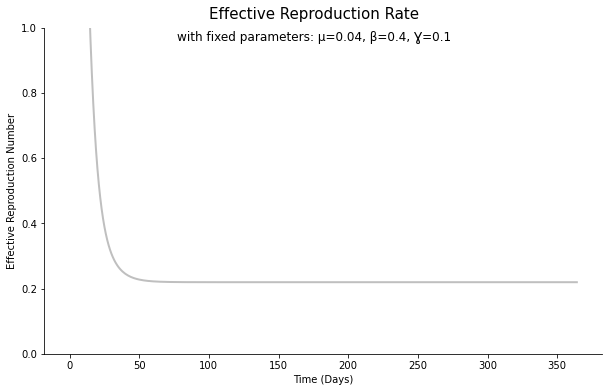

In [25]:
# solving ODEs
ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ_sird, μ))
S, I, R, D = ret.T

print(f"""population size: {N}
infected at t=0: {I0}""")

# plotting effective reproduction rate    
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label="eff. reproduction")
plt.ylim(0,1)
plt.xlabel("Time (Days)")
plt.ylabel("Effective Reproduction Number")
plt.figtext(.5,0.9,"Effective Reproduction Rate", fontsize=15, ha="center")
plt.figtext(.5,.85,f"with fixed parameters: μ={μ}, β={β}, Ɣ={round(Ɣ_sird, 2)}", fontsize=12, ha='center')
for spine in ("top", "right"): 
    ax.spines[spine].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- the effective reproduction number $R_{e}$ declines steeply in the beginning and asymptotically moves towards 0.2
</div>

as a little bonus graph, let's quickly have a look on the effect of $\mu$ (ceteris paribus) ...

In [26]:
# function to calculate R_eff
def get_R_eff(t, S, N):
    R_eff = R_nought*S/N
    return R_eff

population size: 1
infected at t=0: 0.05


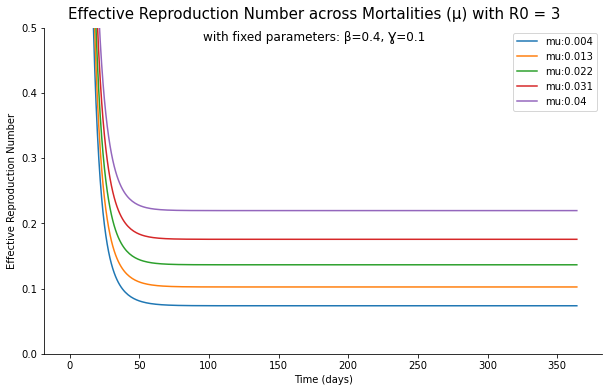

In [27]:
mus_5 = np.linspace(0.004, 0.04, 5)
R_eff_mus_5 = {}

for i in range(len(mus_5)):
    mu = round(mus_5[i], 3)
    ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ_sird, mu))
    S, I, R, D = ret.T
    R_eff_mus_5[f"mu:{mu}"] = get_R_eff(t, S, N)

print(f"""population size: {N}
infected at t=0: {I0}""")
    
fig, ax = plt.subplots(figsize=(10, 6))
plt.ylim(0,0.5)
for i in R_eff_mus_5.keys():
    plt.plot(t, R_eff_mus_5[i])
plt.xlabel("Time (days)")
plt.ylabel("Effective Reproduction Number")
plt.legend(R_eff_mus_5.keys())
plt.figtext(.5,0.9,"Effective Reproduction Number across Mortalities (μ) with R0 = 3", fontsize=15, ha="center")
plt.figtext(.5,.85,f"with fixed parameters: β={β}, Ɣ={round(Ɣ_sird, 2)}", fontsize=12, ha='center')
for spine in ("top", "right"): 
    ax.spines[spine].set_visible(False)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- $\mu$ seems to have a positive impact on how high the level of $R_{e}$ will be in equilibrium
<br/>- the lower the mortality $\mu$ for fixed  $R_{0}$s, the higher the level of $R_{e}(t)$ at all times
</div>

## part 1 (c)

- study numerically the effects of a hard versus soft lockdown (by two for you reasonable values of β), in terms of D(365d)
- what about the cumulative number of deaths after a year?
- assume $\mu = 1\%$ and $\gamma$ compatible with $R_{0} = 4$

we need to set the parameters to the the information, also we set $\beta = 0.5$

note that we use the $\gamma$ previously used $\gamma = 0.01$

In [28]:
# setting parameters
μ = 0.01
R_nought = 4
# calculating β compatible with R_nought = 4
β = R_nought * (Ɣ_sird + μ)

#### intro lockdowns

in the following sections, lockdowns are being introduced which are represented by new $R_{0}$s called $R_{0_{lock}}$ via changed $\beta$s (think of it as decreasing the contact rate component of $\beta$)) at the time of the respective lockdown inception

soft lockdowns only cause slightly reduced $R_{0_{lock}}$s while hard lockdowns cause sigificantly reduced $R_{0_{lock}}$s comparet to initial $R_{0}$s

In [29]:
print(f"recall that the initial basic reproduction nmber is {round(R_nought, 2)}")

recall that the initial basic reproduction nmber is 4


first, we need establish a function of $R_{0}$ that changes via $\beta$ when the lockdown becomes effective ... 

In [30]:
# lockdown function changing the R_nought at a specified date
def R_nought_lock_down(t):
    if t >= L_day:
        new_R_nought = new_R0
    else:
        new_R_nought = R_nought
    return new_R_nought

# corresponding function for respective beta
def beta_lockdown(t):
    # solving R_nouhgt_sird formula for gamma
    beta = R_nought_lock_down(t) * (Ɣ_sird + μ)
    return beta

# set lockdown day
L_day = 10

In [31]:
# integration of ODEs yields S, I, and R
ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ_sird, μ))
S, I, R, D = ret.T

In [32]:
# get the day when S,I,R,D become constant and respective S,I,RD fractions
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

# get the day when effective reproduction = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

no lockdown would look like this ...

population size: 1
infected at t=0: 0.05
R0=4
R_eff=1 at t=13d
susceptible reach bottom on day: 246
susceptible bottom number is: 1.88%
infected reach peak on day: 12
infected peak is: 41.55%
recovered reach peak on day: 246
recovered peak is: 89.2
dead reach peak on day: 246
dead peak is: 8.92%


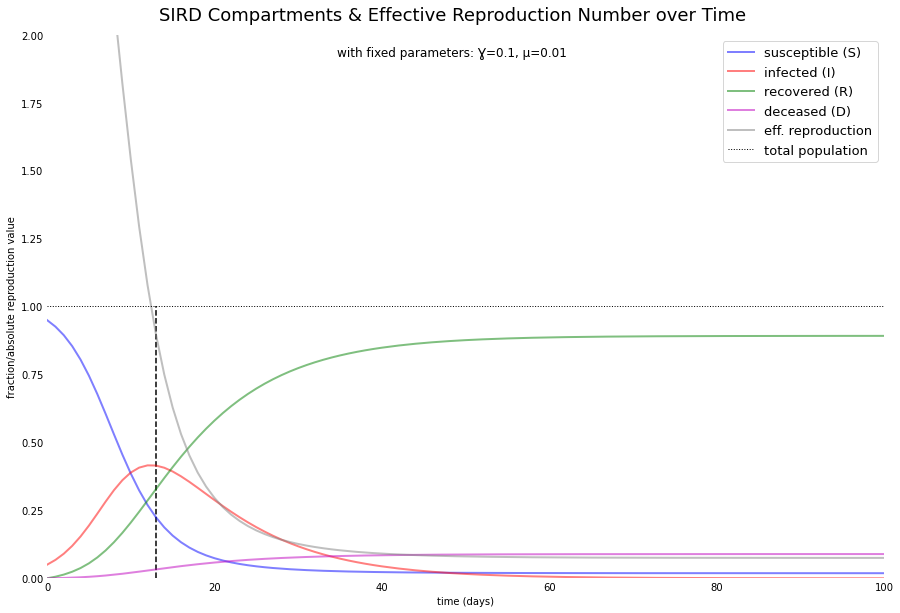

In [33]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}
R0={round(R_nought,2)}
R_eff=1 at t={t_1}d
susceptible reach bottom on day: {S_bottom_date}
susceptible bottom number is: {S_bottom}%
infected reach peak on day: {I_peak_date}
infected peak is: {I_peak}%
recovered reach peak on day: {R_peak_date}
recovered peak is: {R_peak}
dead reach peak on day: {D_peak_date}
dead peak is: {D_peak}%""")

# plotting the data with 4 separate curves for S(t), I(t), R(t) and  D(t)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, S/N, "b", alpha=0.5, lw=2, label="susceptible (S)")
ax.plot(t, I/N, "r", alpha=0.5, lw=2, label="infected (I)")
ax.plot(t, R/N, "g", alpha=0.5, lw=2, label="recovered (R)")
ax.plot(t, D/N, "m", alpha=0.5, lw=2, label="deceased (D)")
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label="eff. reproduction")
ax.set_xlabel("time (days)")
ax.set_ylabel("fraction/absolute reproduction value")
ax.set_ylim(0,2)
ax.set_xlim(0,100)
plt.axhline(y=1,linewidth=1, color="k", label = "total population", linestyle=':')
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ("top", "right", "bottom", "left"):
    ax.spines[spine].set_visible(False)
plt.figtext(.5,.9,f"SIRD Compartments & Effective Reproduction Number over Time", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: Ɣ={round(Ɣ_sird, 2)}, μ={μ}", fontsize=12, ha='center')
plt.legend(fontsize = 13)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- as expected we see the typical development across compartments that we've seen throughout the assignment
</div>

#### soft lockdown 

soft lockdowns only reduce the new $R_{0_{lock}}$ less than hard lockdowns 

In [34]:
# set new R_nought for when lockdown becomes effective
new_R0 = 3

In [35]:
# ODE system including division by N representing fractional/probabilistic view
def sird_ode_lockdown(y, t, N, gamma, mu):
    S, I, R, D = y
    dSdt = -beta_lockdown(t) * S * I / N
    dIdt = beta_lockdown(t) * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

In [36]:
# integration of ODEs yields S, I, and R
ret = odeint(sird_ode_lockdown, y0, t, args=(N, Ɣ_sird, μ))
S, I, R, D = ret.T

In [37]:
# get the day when S,I,R,D become constant and respective S,I,RD fractions
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

# get the day when effective reproduction = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

In [38]:
# calculating effective rated pre & post lockdown t_pre = t[:L_day]
t_pre = t[:L_day]
R_eff_pre = R_nought*S/N
R_eff_pre = R_eff_pre[:L_day]
t_post = t[L_day:]
R_eff_post = new_R0*S/N
R_eff_post = R_eff_post[L_day:]

population size: 1
infected at t=0: 0.05
R0=4
R_eff=1 at t=14d
susceptible reach bottom on day: 259
susceptible bottom number is: 4.29%
infected reach peak on day: 11
infected peak is: 39.27%
recovered reach peak on day: 259
recovered peak is: 87.01
dead reach peak on day: 259
dead peak is: 8.7%


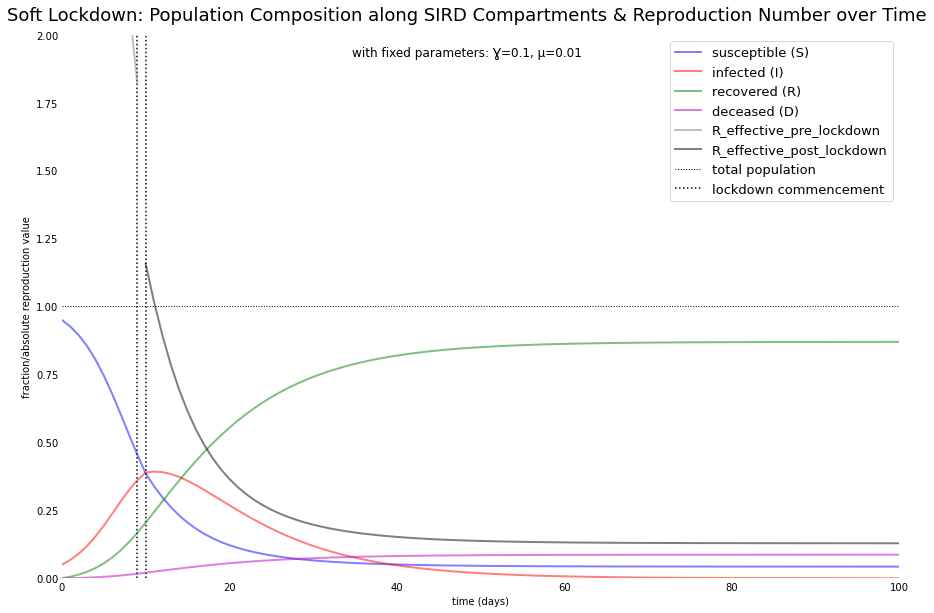

In [39]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}
R0={round(R_nought,2)}
R_eff=1 at t={t_1}d
susceptible reach bottom on day: {S_bottom_date}
susceptible bottom number is: {S_bottom}%
infected reach peak on day: {I_peak_date}
infected peak is: {I_peak}%
recovered reach peak on day: {R_peak_date}
recovered peak is: {R_peak}
dead reach peak on day: {D_peak_date}
dead peak is: {D_peak}%""")

# plotting the data with 4 separate curves for S(t), I(t), R(t) and  D(t)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, S/N, "b", alpha=0.5, lw=2, label="susceptible (S)")
ax.plot(t, I/N, "r", alpha=0.5, lw=2, label="infected (I)")
ax.plot(t, R/N, "g", alpha=0.5, lw=2, label="recovered (R)")
ax.plot(t, D/N, "m", alpha=0.5, lw=2, label="deceased (D)")
ax.plot(t_pre, R_eff_pre, "gray", alpha=0.5, lw=2, label="R_effective_pre_lockdown")
ax.plot(t_post, R_eff_post, "k", alpha=0.5, lw=2, label="R_effective_post_lockdown")
ax.set_xlabel("time (days)")
ax.set_ylabel("fraction/absolute reproduction value")
ax.set_ylim(0,2)
ax.set_xlim(0,100)
plt.axhline(y=1,linewidth=1, color="k", label = "total population", linestyle=':')
ax.vlines(L_day, 0,10, colors='k', linestyles=':', label="lockdown commencement")
ax.vlines(L_day-1, 0,10, colors='k', linestyles=':')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ("top", "right", "bottom", "left"):
    ax.spines[spine].set_visible(False)
plt.figtext(.5,.9,"Soft Lockdown: Population Composition along SIRD Compartments & Reproduction Number over Time", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: Ɣ={round(Ɣ_sird, 2)}, μ={μ}", fontsize=12, ha='center')
plt.legend(fontsize = 13)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- we can see that the slope of the infected curve decreases accompanied by a flattening of this curve when the lockdown becomes active
<br/>- in comparison to no lockdown the cumulative death count at the model's equilibrium slightly decreases from 8.9% to 8.7%
<br/>- the change in individuals that never had the virus is more sigificant with a change from 1.9% to 4.3% of the population 
</div>

#### proactive soft lockdown at t = 0

imagine a region that proactively starts a soft lockdown at t = 0 after neighbouring countries had local outbreaks ...

In [40]:
# ODE system including division by N representing fractional/probabilistic view
def sird_ode_lockdown_pro(y, t, N, gamma, mu):
    S, I, R, D = y
    dSdt = -beta_lockdown_pro(t) * S * I / N
    dIdt = beta_lockdown_pro(t) * S * I / N - gamma * I - mu * I
    dRdt = gamma * I
    dDdt = mu * I
    return dSdt, dIdt, dRdt, dDdt

In [41]:
# lockdown function changing the R_nought at a specified date
def R_nought_lock_down_pro(t):
    if t >= L_day_pro:
        new_R_nought = new_R0
    else:
        new_R_nought = R_nought
    return new_R_nought

# corresponding function for respective beta
def beta_lockdown_pro(t):
    # solving R_nouhgt_sird formula for gamma
    beta = R_nought_lock_down_pro(t) * (Ɣ_sird + μ)
    return beta

# set lockdown day
L_day_pro = 0

In [42]:
# integration of ODEs yields S, I, and R
ret = odeint(sird_ode_lockdown_pro, y0, t, args=(N, Ɣ_sird, μ))
S, I, R, D = ret.T

In [43]:
# get the day when S,I,R,D become constant and respective S,I,RD fractions
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

# get the day when effective reproduction = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

In [44]:
# calculating effective rated pre & post lockdown t_pre = t[:L_day_pro]
t_pre = t[:L_day_pro]
R_eff_pre = R_nought*S/N
R_eff_pre = R_eff_pre[:L_day_pro]
t_post = t[L_day_pro:]
R_eff_post = new_R0*S/N
R_eff_post = R_eff_post[L_day_pro:]

population size: 1
infected at t=0: 0.05
R0=4
R_eff=1 at t=20d
susceptible reach bottom on day: 277
susceptible bottom number is: 5.59%
infected reach peak on day: 16
infected peak is: 31.74%
recovered reach peak on day: 277
recovered peak is: 85.82
dead reach peak on day: 277
dead peak is: 8.58%


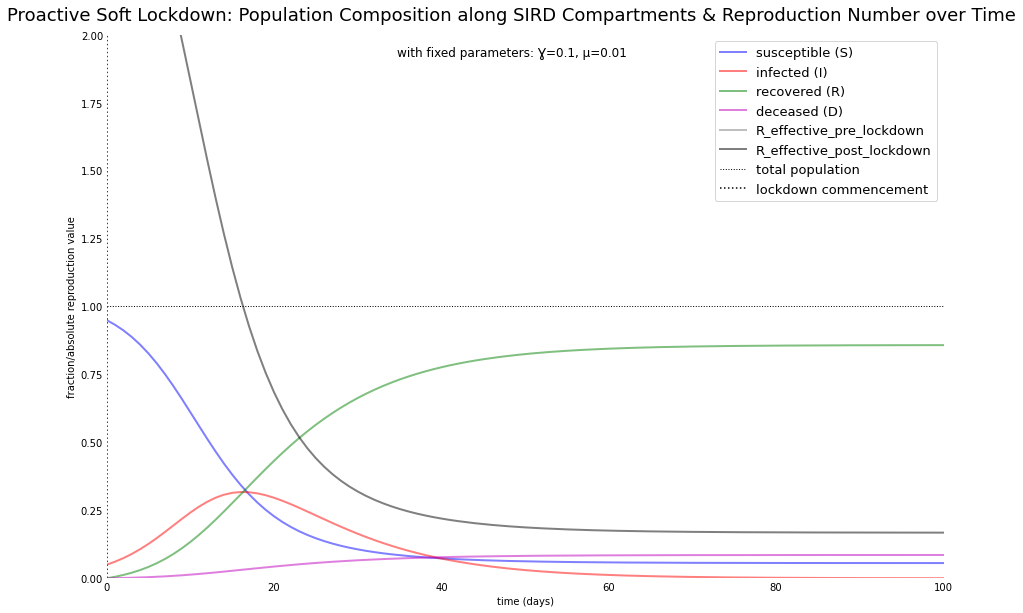

In [45]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}
R0={round(R_nought,2)}
R_eff=1 at t={t_1}d
susceptible reach bottom on day: {S_bottom_date}
susceptible bottom number is: {S_bottom}%
infected reach peak on day: {I_peak_date}
infected peak is: {I_peak}%
recovered reach peak on day: {R_peak_date}
recovered peak is: {R_peak}
dead reach peak on day: {D_peak_date}
dead peak is: {D_peak}%""")

# plotting the data with 4 separate curves for S(t), I(t), R(t) and  D(t)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, S/N, "b", alpha=0.5, lw=2, label="susceptible (S)")
ax.plot(t, I/N, "r", alpha=0.5, lw=2, label="infected (I)")
ax.plot(t, R/N, "g", alpha=0.5, lw=2, label="recovered (R)")
ax.plot(t, D/N, "m", alpha=0.5, lw=2, label="deceased (D)")
ax.plot(t_pre, R_eff_pre, "gray", alpha=0.5, lw=2, label="R_effective_pre_lockdown")
ax.plot(t_post, R_eff_post, "k", alpha=0.5, lw=2, label="R_effective_post_lockdown")
ax.set_xlabel("time (days)")
ax.set_ylabel("fraction/absolute reproduction value")
ax.set_ylim(0,2)
ax.set_xlim(0,100)
plt.axhline(y=1,linewidth=1, color="k", label = "total population", linestyle=':')
ax.vlines(L_day_pro, 0,10, colors='k', linestyles=':', label="lockdown commencement")
ax.vlines(L_day_pro-1, 0,10, colors='k', linestyles=':')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ("top", "right", "bottom", "left"):
    ax.spines[spine].set_visible(False)
plt.figtext(.5,.9,"Proactive Soft Lockdown: Population Composition along SIRD Compartments & Reproduction Number over Time", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: Ɣ={round(Ɣ_sird, 2)}, μ={μ}", fontsize=12, ha='center')
plt.legend(fontsize = 13)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- in spite of a lockdown from t=0, we can clearly see a typical infection curve
<br/>- in comparison to the soft lockdown the cumulative death count at the model's equilibrium slightly decreases from 8.7% to 8.6%
<br/>- the change in individuals that never had the virus is more sigificant but still small with a change from 4.3% to 5.6% of the population 
</div>

#### hard lockdown 

In [46]:
# set new R_noughtfor when lockdown becomes effective
new_R0 = 0.4

In [47]:
# integration of ODEs yields S, I, and R
ret = odeint(sird_ode_lockdown, y0, t, args=(N, Ɣ_sird, μ))
S, I, R, D = ret.T

In [48]:
# get the day when S,I,R,D become constant and respective S,I,RD fractions
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

# get the day when effective reproduction = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

In [49]:
# calculating effective rated pre & post lockdown t_pre = t[:L_day]
t_pre = t[:L_day]
R_eff_pre = R_nought*S/N
R_eff_pre = R_eff_pre[:L_day]
t_post = t[L_day:]
R_eff_post = new_R0*S/N
R_eff_post = R_eff_post[L_day:]

population size: 1
infected at t=0: 0.05
R0=4
R_eff=1 at t=0d
susceptible reach bottom on day: 253
susceptible bottom number is: 32.16%
infected reach peak on day: 10
infected peak is: 38.9%
recovered reach peak on day: 253
recovered peak is: 61.67
dead reach peak on day: 253
dead peak is: 6.17%


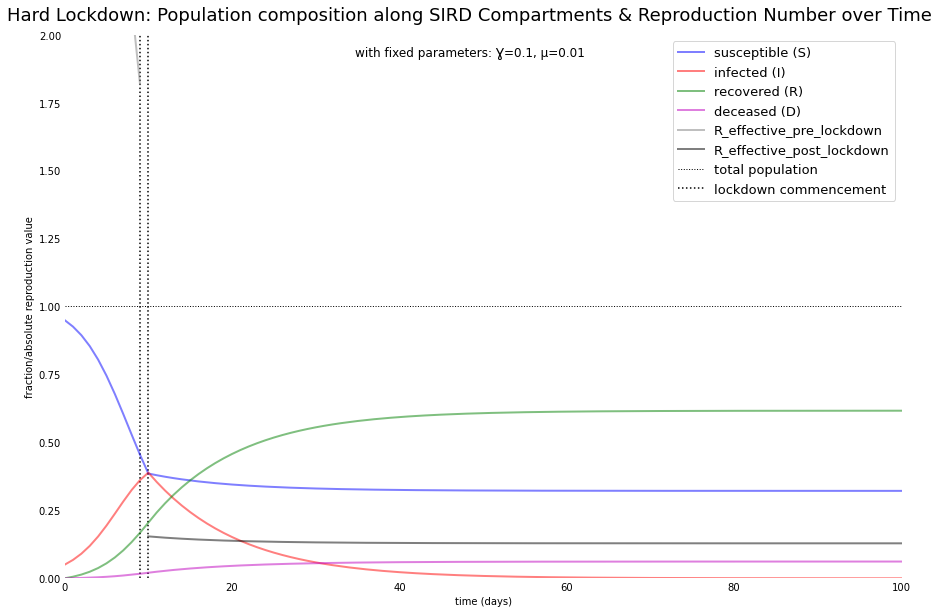

In [50]:
# print additional info
print(f"""population size: {N}
infected at t=0: {I0}
R0={round(R_nought,2)}
R_eff=1 at t={t_1}d
susceptible reach bottom on day: {S_bottom_date}
susceptible bottom number is: {S_bottom}%
infected reach peak on day: {I_peak_date}
infected peak is: {I_peak}%
recovered reach peak on day: {R_peak_date}
recovered peak is: {R_peak}
dead reach peak on day: {D_peak_date}
dead peak is: {D_peak}%""")

# plotting the data with 4 separate curves for S(t), I(t), R(t) and  D(t)
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(t, S/N, "b", alpha=0.5, lw=2, label="susceptible (S)")
ax.plot(t, I/N, "r", alpha=0.5, lw=2, label="infected (I)")
ax.plot(t, R/N, "g", alpha=0.5, lw=2, label="recovered (R)")
ax.plot(t, D/N, "m", alpha=0.5, lw=2, label="deceased (D)")
ax.plot(t_pre, R_eff_pre, "gray", alpha=0.5, lw=2, label="R_effective_pre_lockdown")
ax.plot(t_post, R_eff_post, "k", alpha=0.5, lw=2, label="R_effective_post_lockdown")
ax.set_xlabel("time (days)")
ax.set_ylabel("fraction/absolute reproduction value")
ax.set_ylim(0,2)
ax.set_xlim(0,100)
plt.axhline(y=1,linewidth=1, color="k", label = "total population", linestyle=':')
ax.vlines(L_day, 0,10, colors='k', linestyles=':', label="lockdown commencement")
ax.vlines(L_day-1, 0,10, colors='k', linestyles=':')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ("top", "right", "bottom", "left"):
    ax.spines[spine].set_visible(False)
plt.figtext(.5,.9,"Hard Lockdown: Population composition along SIRD Compartments & Reproduction Number over Time", fontsize=18, ha='center')
plt.figtext(.5,.85,f"with fixed parameters: Ɣ={round(Ɣ_sird, 2)}, μ={μ}", fontsize=12, ha='center')
plt.legend(fontsize = 13)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- when the lockdown becomes active the infection trends gets immediately reversed
<br/>- in comparison to the soft lockdown the cumulative death count at the model's equilibrium decreases sigificantly from 8.7% to 6.2%
<br/>- the change in individuals that never had the virus is huge: from 4.3% to 32.2% of the population 
</div>

# part 2 - Principal Component Disasters

In [51]:
# imports
from sklearn.datasets import make_blobs, make_moons
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr 
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import sympy as sympy
import numpy as np
from scipy import *
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Math, Latex
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## part 2 (a)
- create labeled surrogate data sets
- perform a PCA/cass prediction with one-vs-rest logistic regression

### (a) clearly separable blobs

let's create the data, ensuring separability via small standard deviations ...

In [52]:
X, y = make_blobs(n_samples=1500, centers=4, n_features=10, cluster_std = 0.5, random_state = 11)

let's check whether they are clearly seperable in 3d ...

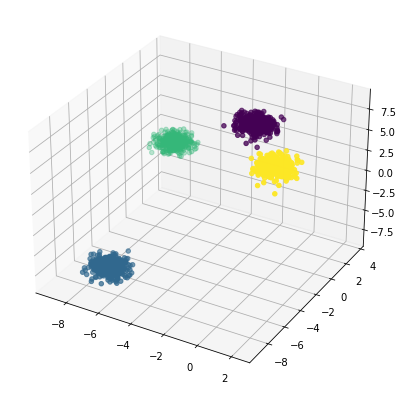

In [53]:
# plotting 3 arbitrarily picked dimensions 
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,4], X[:,7], X[:,9], c=y)

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- the 4 classes are clearly separable from each other
</div>

let's perform a PCA ...

In [54]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

# compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
cov_mat = np.cov(X_train_std.T)
EVal, EVec = np.linalg.eig(cov_mat)

# calculate (sum of) explained variances
sum_EVal = np.sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]

now, we can take a lok at the elbow plot ...

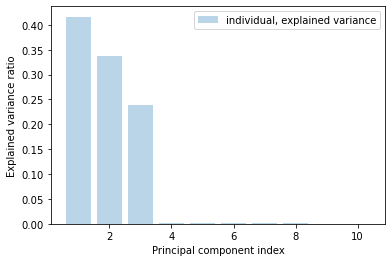

In [55]:
# plot scree plot
plt.bar(range(1,11), var_exp, alpha=0.3, align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- interestingly, the data's variance is almost completely explainable through 3 PCs
<br/>- therefore, an elbow clearly occurs at the 4th PC, which is why the first 3 PCs are being used going forward
</div>

let's perform a class prediction with one-vs-rest logistic regression ...

In [56]:
# set up PCA and logistic regression model
pca = PCA(n_components=3)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# sit and transform training data, given on PCA reduction to k(=3) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

now, let's see how the resulting decision boundaries look like ...

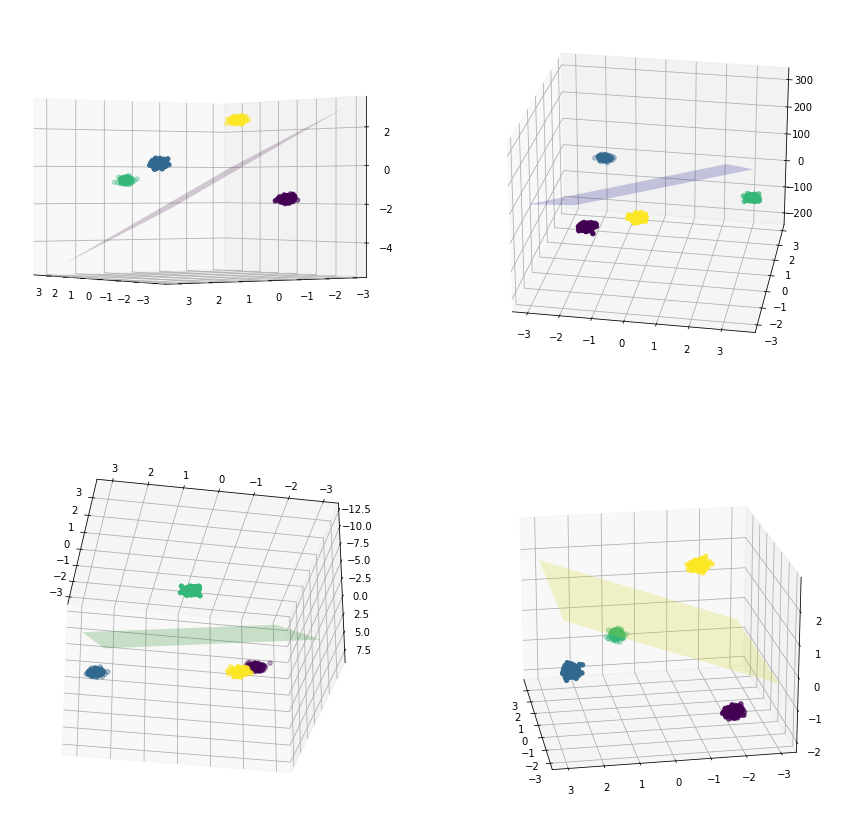

In [57]:
# for ploting the blobs
xdata=X_train_pca[:,0]
ydata=X_train_pca[:,1]
zdata=X_train_pca[:,2]

#plot decision boundary
clf = lr.fit(X_train_pca, y_train) 
z1 = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
z2 = lambda x,y: (-clf.intercept_[1]-clf.coef_[1][0]*x -clf.coef_[1][1]*y) / clf.coef_[1][2]
z3 = lambda x,y: (-clf.intercept_[2]-clf.coef_[2][0]*x -clf.coef_[2][1]*y) / clf.coef_[2][2]
z4 = lambda x,y: (-clf.intercept_[3]-clf.coef_[3][0]*x -clf.coef_[3][1]*y) / clf.coef_[3][2]

tmp = np.linspace(-3,3,50)
x,y = np.meshgrid(tmp,tmp)

f, axs = plt.subplots(2,2,figsize=(15,15))

ax = plt.subplot(221, projection="3d")
ax.scatter3D(xdata, ydata, zdata, c = y_train)
ax.plot_surface(x, y, z1(x,y),alpha=0.2,color = 'purple')
ax.view_init(0, 145) 

ax2 = plt.subplot(222, projection="3d")
ax2.scatter3D(xdata, ydata, zdata, c = y_train)
ax2.plot_surface(x, y, z2(x,y),alpha=0.2,color = 'blue')
ax2.view_init(25, 280) 

ax3 = plt.subplot(223, projection="3d")
ax3.plot_surface(x, y, z3(x,y),alpha=0.2,color = 'green')
ax3.scatter3D(xdata, ydata, zdata, c = y_train)
ax3.view_init(150, 190)

ax4 = plt.subplot(224, projection="3d")
ax4.plot_surface(x, y, z4(x,y),alpha=0.2,color = 'yellow')
ax4.scatter3D(xdata, ydata, zdata, c = y_train)
ax4.view_init(20, 170)

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- using the first 3 PCs from 4 clearly seperable blobs, the hyperplane decision boundaries resulting from logistic regression are able to clearly separate all 4 classes from each other
</div>

### (a) strongly overlapping blobs

let's create the data,ensuring overlaps via high standard deviation ...

In [58]:
X, y = make_blobs(n_samples=1500, centers=4, n_features=10, cluster_std = 10, random_state = 11)

let's have a look at how the blobs look in 3d ...

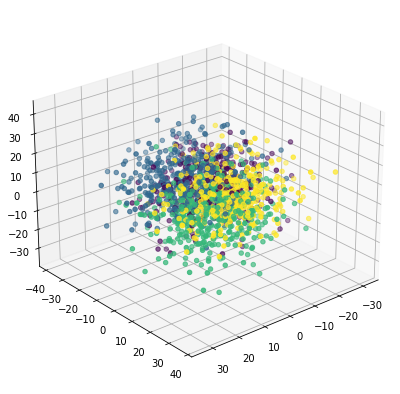

In [59]:
# plotting 3 arbitrarily picked dimensions 
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y)
ax.view_init(25, 50)

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- the 4 classes are not clearly seperable anymore due to strong overlaps
</div>

let's perform a PCA ...

In [60]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

# compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
cov_mat = np.cov(X_train_std.T)
EVal, EVec = np.linalg.eig(cov_mat)

# calculate (sum of) explained variances
sum_EVal = np.sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]

now, we can take a lok at the elbow plot ...

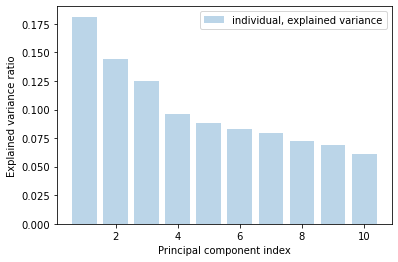

In [61]:
# plot scree plot
plt.bar(range(1,11), var_exp, alpha=0.3, align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- we can see that each PC has a significant share in explaining variance
<br/>- as the scree plot's slope exhibits a kink at the 4th PC, the first 3 PCs are used going forward   
</div>

let's perform a class prediction with one-vs-rest logistic regression ...

In [62]:
# set up PCA and logistic regression model
pca = PCA(n_components=3)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# sit and transform training data, given on PCA reduction to k(=3) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

now, let's see how the resulting decision boundaries look like ...

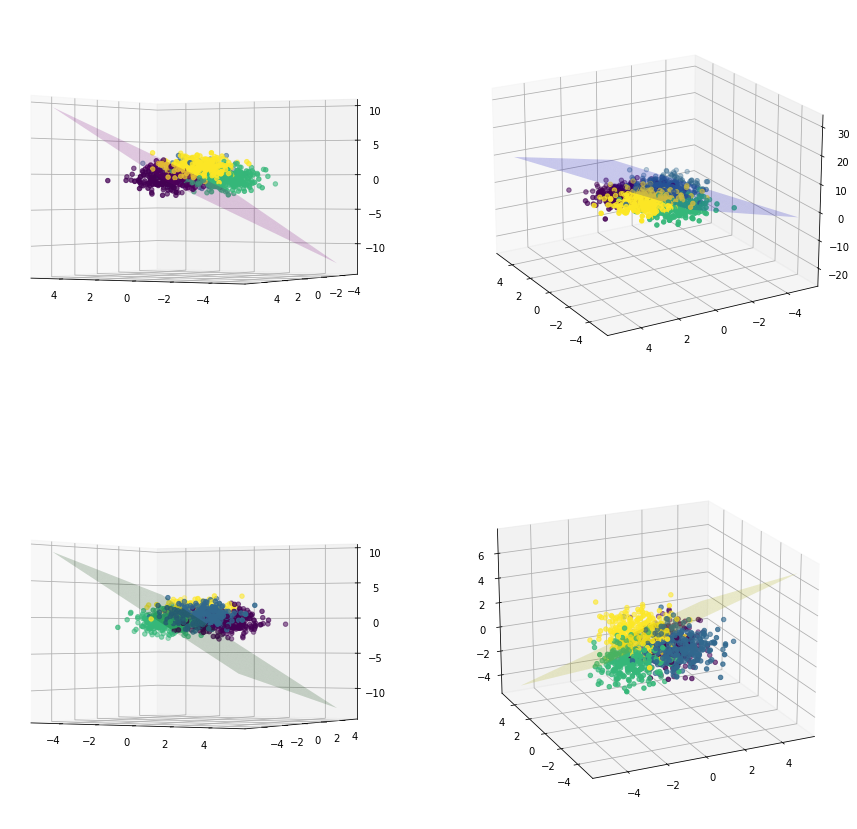

In [63]:
# for ploting the blobs
xdata=X_train_pca[:,0]
ydata=X_train_pca[:,1]
zdata=X_train_pca[:,2]

#plot decision boundary
clf = lr.fit(X_train_pca, y_train) 
z1 = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
z2 = lambda x,y: (-clf.intercept_[1]-clf.coef_[1][0]*x -clf.coef_[1][1]*y) / clf.coef_[1][2]
z3 = lambda x,y: (-clf.intercept_[2]-clf.coef_[2][0]*x -clf.coef_[2][1]*y) / clf.coef_[2][2]
z4 = lambda x,y: (-clf.intercept_[3]-clf.coef_[3][0]*x -clf.coef_[3][1]*y) / clf.coef_[3][2]

tmp = np.linspace(-5,5,50)
x,y = np.meshgrid(tmp,tmp)

f, axs = plt.subplots(2,2,figsize=(15,15))

ax = plt.subplot(221, projection="3d")
ax.scatter3D(xdata, ydata, zdata, c = y_train)
ax.plot_surface(x, y, z1(x,y),alpha=0.2,color = 'purple')
ax.view_init(0, 120) # rotation

ax2 = plt.subplot(222, projection="3d")
ax2.scatter3D(xdata, ydata, zdata, c = y_train)
ax2.plot_surface(x, y, z2(x,y),alpha=0.2,color = 'blue')
ax2.view_init(20, 150) # rotation

ax3 = plt.subplot(223, projection="3d")
ax3.plot_surface(x, y, z3(x,y),alpha=0.2,color = 'green')
ax3.scatter3D(xdata, ydata, zdata, c = y_train)
ax3.view_init(0, 300)

ax4 = plt.subplot(224, projection="3d")
ax4.plot_surface(x, y, z4(x,y),alpha=0.2,color = 'yellow')
ax4.scatter3D(xdata, ydata, zdata, c = y_train)
ax4.view_init(20, 245)

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- despite the existence of strong overlaps the decision boundaries are still intuitively well-founded
<br/>- however, flawless classification is not possible based on the underlying data and methods used    
</div>

## part 2 (b)
- create labeled surrogate data sets
- perform a PCA/cass prediction with one-vs-rest logistic regression

### touching parabolas

let's create the data, ensuring separability via small standard deviation ...

In [64]:
# create two small moons in 2D and one target vairable y
X, y = make_moons(n_samples=3000, random_state=0)

# use the values of the first column, shuffle it randomly and create the 3rd dimension by this
Z1 = [item[0] for item in X]
Z = sorted(Z1, key=lambda v: (v, random.random()))
Z = np.array(Z)

# merge a 2D np array and 1D array to an 3D array
X = np.column_stack((X, Z))

# move the positive class so it becomes 2 touching parabolas 
x_cord = [item[0] for item in X]
y_cord = [item[1] for item in X]
z_cord = [item[2] for item in X]

for i in range(len(X)):
    if y[i] == 1:
        x_cord[i] -= 1
        y_cord[i] += 1.5

let's check whow the data looks like in 3d ...

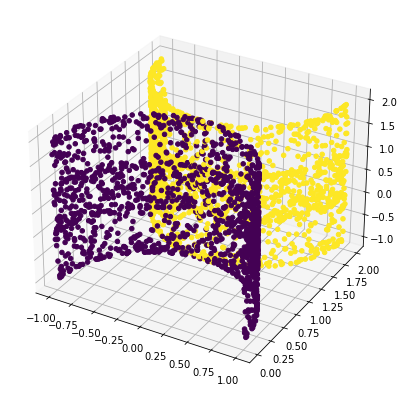

In [65]:
#creates a 3D projection of the 2 touching parabola
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_cord, y_cord, z_cord, c=y, alpha = 1)
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- the 2 classes are arranged in 3d parabolas which are not clearly separable at the touching point
    
</div>

let's perform a PCA ...

In [66]:
# create a new X array with the moved values
X = pd.DataFrame()
X["x_cord"] = x_cord
X["y_cord"] = y_cord
X["z_cord"] = z_cord
X = X.to_numpy()

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# standardize the features (zero mean, unit variance) 
sc = StandardScaler()

# fit results must be used later (mu and sigma)
X_train_std = sc.fit_transform(X_train) 

# normalize test data set with mu/sigma of training data
X_test_std = sc.transform(X_test)

# compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
cov_mat = np.cov(X_train_std.T)
EVal, EVec = np.linalg.eig(cov_mat)

# calculate (sum of) explained variances
sum_EVal = np.sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]

now, we can take a lok at the elbow plot ...

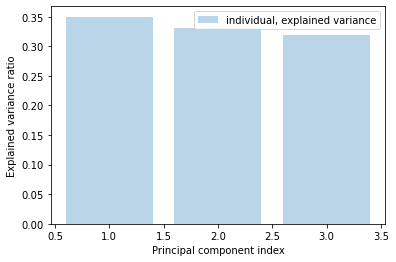

In [67]:
# plot scree plot
plt.bar(range(1,4), var_exp, alpha=0.3, 
        align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- the share in explaining the data's variance is distributed almost equally over its 3 PCs
<br/>- thus, no clear elbow can be identified
<br/>- for the purpose of dimensionality reduction, it's appropriate to use the first 2 PCs going forward      
</div>

let's perform a class prediction with one-vs-rest logistic regression ...

In [68]:
# set up PCA and logistic regression model
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', solver='liblinear')

# fit and transform training data, given on PCA reduction to k(=3) principle components
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr.fit(X_train_pca, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

now, let's see how the resulting decision boundary looks like ...

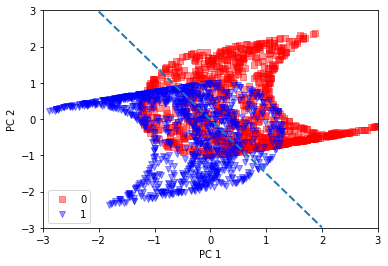

In [69]:
# plot the data and the decision boundary
colors = ['r', 'b']
markers = ['s', 'v']
b = lr.intercept_[0]
w1, w2 = lr.coef_.T
c = -b/w2
m = -w1/w2

xmin, xmax = -2, 2
ymin, ymax = -1, 1
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, lw=2, ls='--')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], 
                X_train_pca[y_train==l, 1], 
                color=c, label=l, marker=m, alpha=0.4)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

<div class="alert alert-success"> <b>takeaway</b>:
<br/>- based on the distribution of the data based on its 2 first PCs resulting in strong overlaps, the classification is not accurate
<br/>- better accuracy could have been achieved when only taking into account the x and y axis without using PCA initially
</div>